In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def to_chromatic_coordinates(img):
    '''
    Asume imagen color en RGB uint8 y pasa a coordenadas cromaticas.
    '''
    #sum_of_channels = img[:,:,0] + img[:,:,1] + img[:,:,2]
    sum_of_channels = cv.add(img[:,:,0],cv.add(img[:,:,1],img[:,:,2]))
    adjusted_red = img[:,:,0] / (sum_of_channels+0.000001)
    adjusted_green = img[:,:,1] / (sum_of_channels+0.000001)
    adjusted_blue = img[:,:,2] / (sum_of_channels+0.000001)
    adjusted_img = np.stack([adjusted_red,adjusted_green,adjusted_blue],axis=2)
    return adjusted_img

In [13]:
def white_patch(img,percentile=100):
    '''
    Implementacion del White Patch algorithm.
    <INPUT> np.array - Imagen de MxNx3, asume RGB
    <OUTPUT> np.array [MxNx3] - Imagen ajustada con el white patch algorithm
    
    '''
    # Toma maximos por canales
    Rmax = np.percentile(img[:,:,0],percentile).astype(np.uint8)
    Gmax = np.percentile(img[:,:,1],percentile).astype(np.uint8)
    Bmax = np.percentile(img[:,:,2],percentile).astype(np.uint8)
    
    new_red = 255/Rmax * img[:,:,0]
    new_green= 255/Gmax * img[:,:,1]
    new_blue= 255/Bmax * img[:,:,2]
      
    adjusted_img = np.round(np.stack([new_red,new_green,new_blue],axis=2)).astype(np.uint8)
    return adjusted_img
    

# Pruebas de contraste - Coordenadas cromaticas

In [59]:
claro = cv.imread('CoordCrom_1.png')
claro = cv.cvtColor(img, cv.COLOR_BGR2RGB)

medio = cv.imread('CoordCrom_2.png')
medio = cv.cvtColor(medio, cv.COLOR_BGR2RGB)

oscuro = cv.imread('CoordCrom_3.png')
oscuro = cv.cvtColor(oscuro, cv.COLOR_BGR2RGB)


In [78]:
adjusted_claro = to_chromatic_coordinates(claro)
adjusted_medio = to_chromatic_coordinates(medio)
adjusted_oscuro = to_chromatic_coordinates(oscuro)

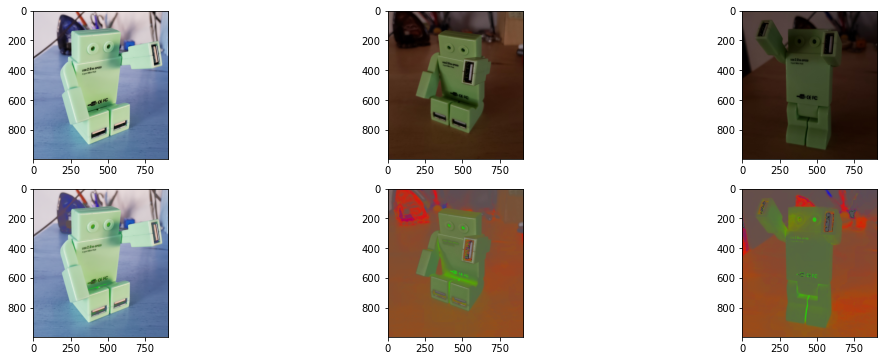

In [87]:
f, ax = plt.subplots(ncols=3,nrows=2,figsize=(18,6))

ax[0][0].imshow(claro)
ax[1][0].imshow(adjusted_claro)

ax[0][1].imshow(medio)
ax[1][1].imshow(adjusted_medio)

ax[0][2].imshow(oscuro)
ax[1][2].imshow(adjusted_oscuro)

plt.show()

# White patch algorithm - Luchando contra la iluminación de colores

In [15]:
#Cargamos imagenes y ponemos en RGB
r_tito = cv.imread('WP_R.png')
r_tito = cv.cvtColor(r_tito,cv.COLOR_BGR2RGB)

b_tito = cv.imread('WP_B.png')
b_tito = cv.cvtColor(b_tito,cv.COLOR_BGR2RGB)

o_tito = cv.imread('WP_O.png')
o_tito = cv.cvtColor(o_tito,cv.COLOR_BGR2RGB)


In [16]:
adjusted_r_tito = white_patch(r_tito,100)

adjusted_o_tito = white_patch(o_tito,100)

adjusted_b_tito = white_patch(b_tito,100)

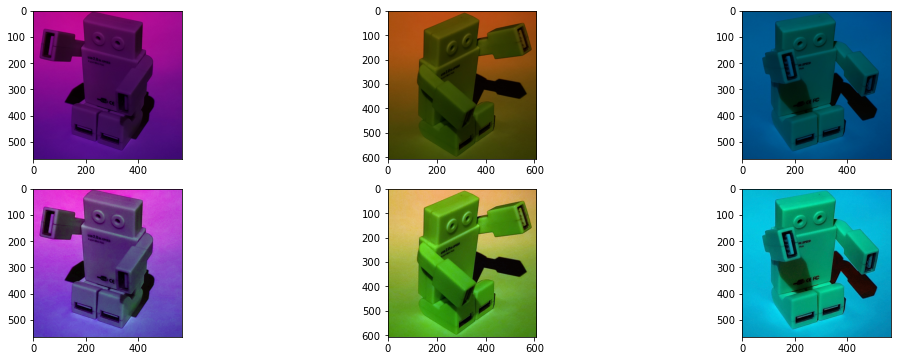

In [17]:
f, ax = plt.subplots(ncols=3,nrows=2,figsize=(18,6))

ax[0][0].imshow(r_tito)
ax[1][0].imshow(adjusted_r_tito)

ax[0][1].imshow(o_tito)
ax[1][1].imshow(adjusted_o_tito)

ax[0][2].imshow(b_tito)
ax[1][2].imshow(adjusted_b_tito)

plt.show()

## Test case con percentiles

### Percentil 99

In [18]:
adjusted_r_tito = white_patch(r_tito,99)

adjusted_o_tito = white_patch(o_tito,99)

adjusted_b_tito = white_patch(b_tito,99)

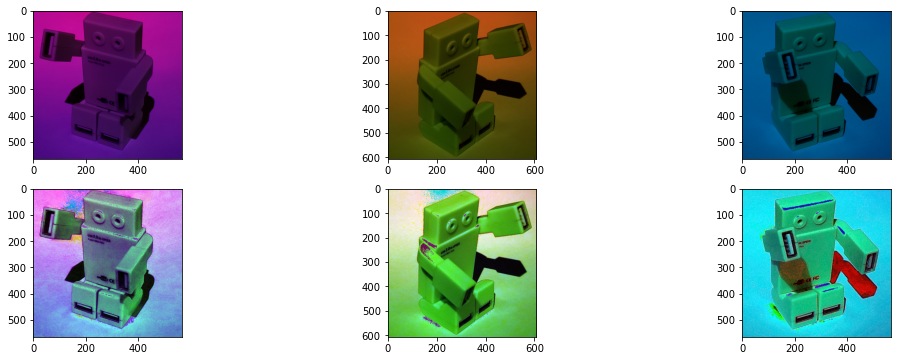

In [19]:
f, ax = plt.subplots(ncols=3,nrows=2,figsize=(18,6))

ax[0][0].imshow(r_tito)
ax[1][0].imshow(adjusted_r_tito)

ax[0][1].imshow(o_tito)
ax[1][1].imshow(adjusted_o_tito)

ax[0][2].imshow(b_tito)
ax[1][2].imshow(adjusted_b_tito)

plt.show()

### Percentil 98

In [20]:
adjusted_r_tito = white_patch(r_tito,98)

adjusted_o_tito = white_patch(o_tito,98)

adjusted_b_tito = white_patch(b_tito,98)

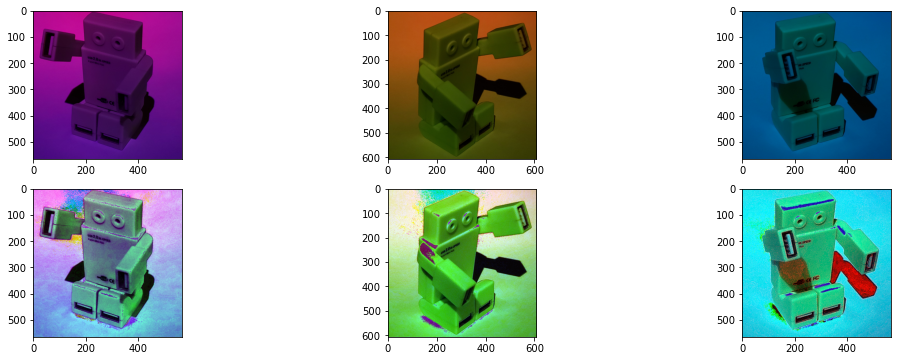

In [21]:
f, ax = plt.subplots(ncols=3,nrows=2,figsize=(18,6))

ax[0][0].imshow(r_tito)
ax[1][0].imshow(adjusted_r_tito)

ax[0][1].imshow(o_tito)
ax[1][1].imshow(adjusted_o_tito)

ax[0][2].imshow(b_tito)
ax[1][2].imshow(adjusted_b_tito)

plt.show()

### Comentarios

Llama la atención lo mucho que cambia al imagen por tomar el p99 o 98, vamos a revisar los valores en RED

In [26]:
(np.percentile(r_tito[:,:,0],100),np.percentile(r_tito[:,:,0],99),np.percentile(r_tito[:,:,0],98))

(208.0, 192.0, 191.0)

Vemos que el cambio del p100 (i.e. max), hacia los valores de p99 y p98 no es tan despreciable como hubiéramos esperado.

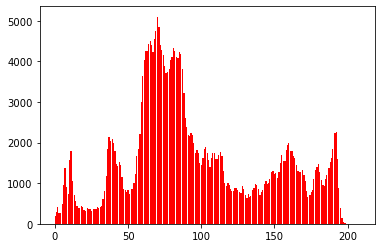

In [31]:
plt.hist(r_tito[:,:,0].flatten(),color='red',bins=256)
plt.show()

# Test cases en las manos

Vemos que en el test-case de las manos funciona bien.

In [4]:
#Cargamos imagenes y ponemos en RGB
manos_red = cv.imread('test_red.png')
manos_red = cv.cvtColor(manos_red,cv.COLOR_BGR2RGB)

manos_blue = cv.imread('test_blue.png')
manos_blue = cv.cvtColor(manos_blue,cv.COLOR_BGR2RGB)

manos_green = cv.imread('test_green.png')
manos_green = cv.cvtColor(manos_green,cv.COLOR_BGR2RGB)


In [22]:
adj_manos_red = white_patch(manos_red,percentile=100)

adj_manos_blue = white_patch(manos_blue,percentile=100)

adj_manos_green = white_patch(manos_green,percentile=100)

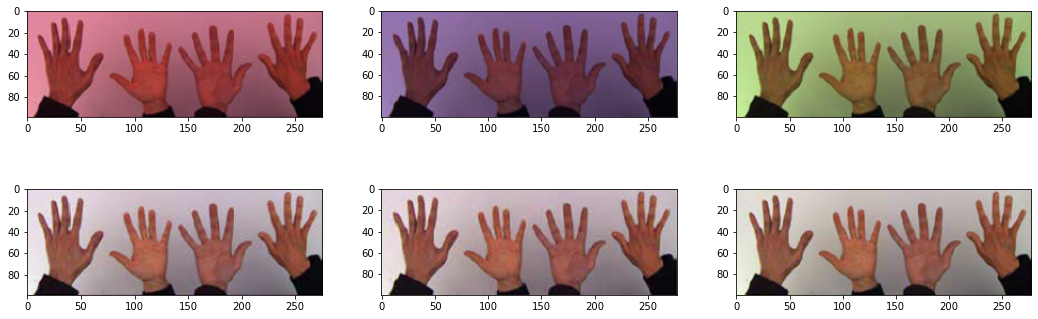

In [23]:
f, ax = plt.subplots(ncols=3,nrows=2,figsize=(18,6))

ax[0][0].imshow(manos_red)
ax[1][0].imshow(adj_manos_red)

ax[0][1].imshow(manos_blue)
ax[1][1].imshow(adj_manos_blue)

ax[0][2].imshow(manos_green)
ax[1][2].imshow(adj_manos_green)

plt.show()

Vamos a ver en el ejemplo de los Azules como se nos mueven los histogramas por canal.

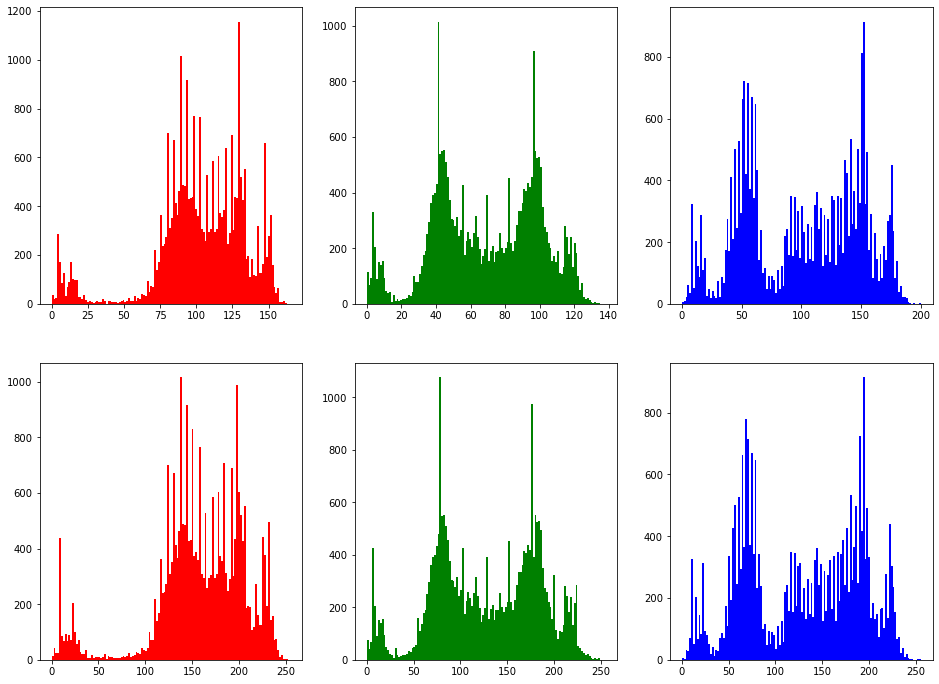

In [42]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(16,12))

ax[0,0].hist(manos_blue[:,:,0].flatten(),color='red',bins=128)
ax[0,1].hist(manos_blue[:,:,1].flatten(),color='green',bins=128)
ax[0,2].hist(manos_blue[:,:,2].flatten(),color='blue',bins=128)

ax[1,0].hist(adj_manos_blue[:,:,0].flatten(),color='red',bins=128)
ax[1,1].hist(adj_manos_blue[:,:,1].flatten(),color='green',bins=128)
ax[1,2].hist(adj_manos_blue[:,:,2].flatten(),color='blue',bins=128)

plt.show()

In [45]:
255/np.array([np.max(manos_blue[:,:,0]),np.max(manos_blue[:,:,1]),np.max(manos_blue[:,:,2])])

array([1.54545455, 1.84782609, 1.275     ])

Esos son los factores por los que se multiplican a los 3 canales.

Vemos que el Canal Azul, por ser la fuente de iluminación de ese color, es el que menos se agranda. El B_Max es mayor al Red Max y Green Max, así, estos otros dos colores son los que van a aumentarse en mayor proporción.

Zoom en el rojo

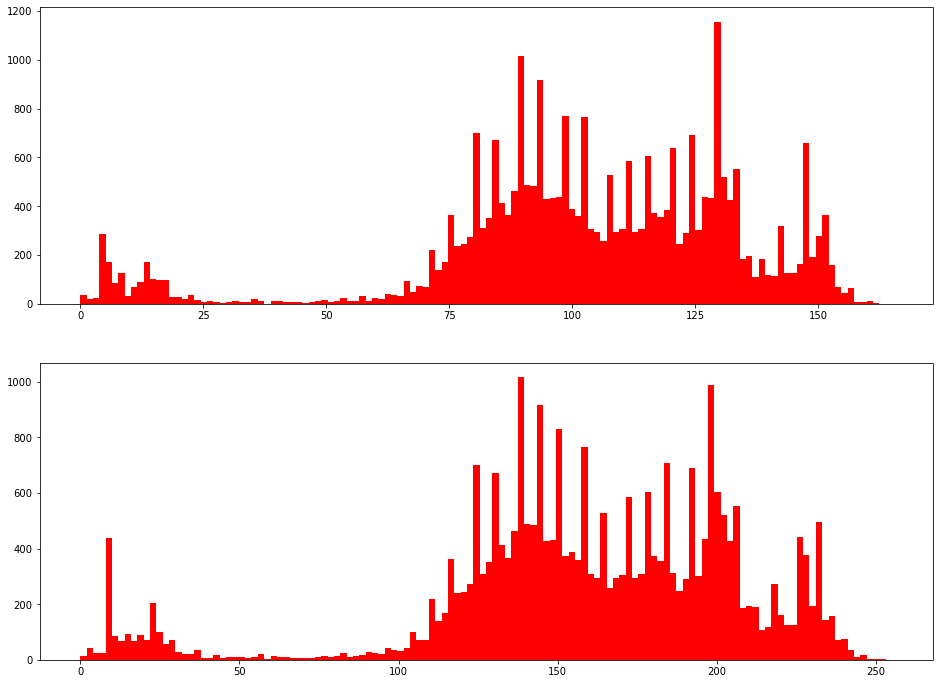

In [53]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(16,12))


ax[0].hist(manos_blue[:,:,0].flatten(),color='red',bins=128)

ax[1].hist(adj_manos_blue[:,:,0].flatten(),color='red',bins=128)

plt.show()